In [59]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [60]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [61]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [62]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [63]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.005796714892639223


In [64]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


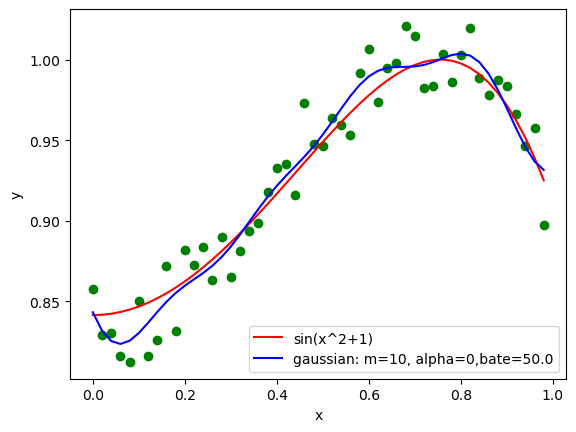

w:  [ 1.12366992 -0.71728326  1.21475732 -1.945503    2.23778175 -2.54402005
  2.39349757 -2.07520772  1.36019441 -0.65965445]


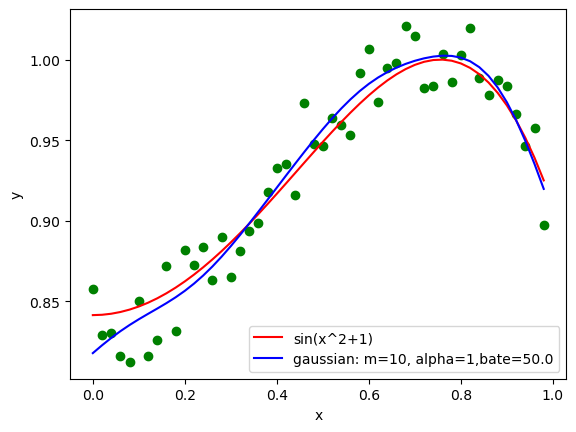

w:  [ 0.77107017  0.06684671 -0.03388467  0.06123278  0.03814471  0.0355106
  0.09392293  0.05713861  0.0344022   0.14398138]


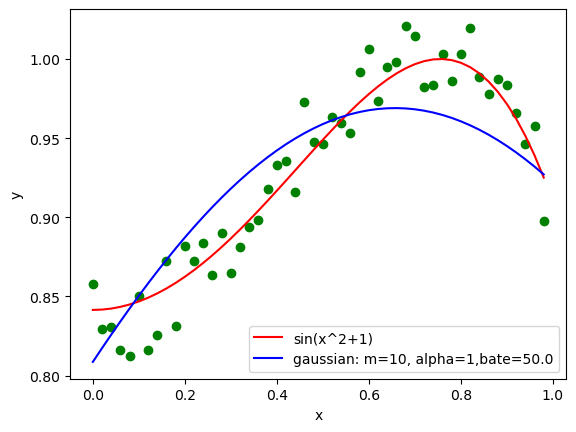

w:  [0.11121855 0.0053619  0.02776947 0.05141222 0.07565617 0.09981918
 0.12320278 0.14512573 0.16495696 0.18214574]


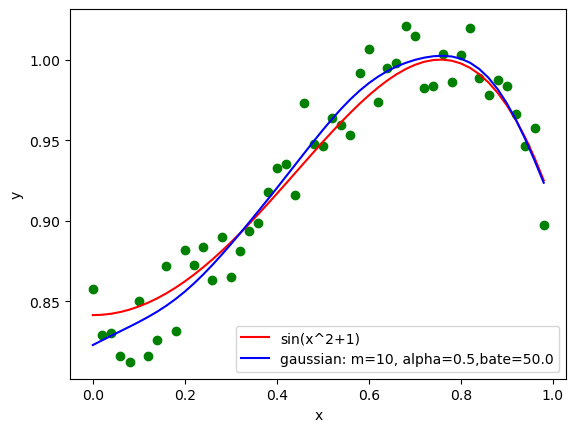

w:  [ 0.79604223  0.04130862 -0.03399862  0.06473345  0.01640394  0.03495262
  0.09042701  0.03835857  0.04712388  0.11573965]


In [65]:
params = [(0.02, 0), (0.02, 1), (1, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



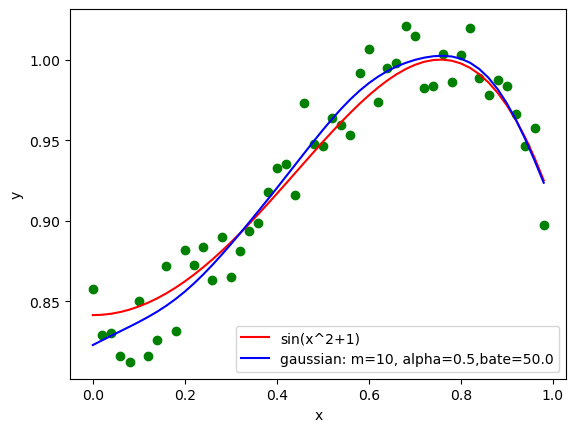

w:  [ 0.79604223  0.04130862 -0.03399862  0.06473345  0.01640394  0.03495262
  0.09042701  0.03835857  0.04712388  0.11573965]


In [66]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

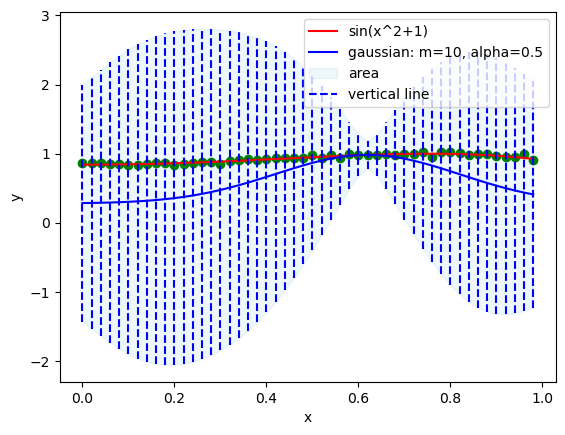

[31]
1


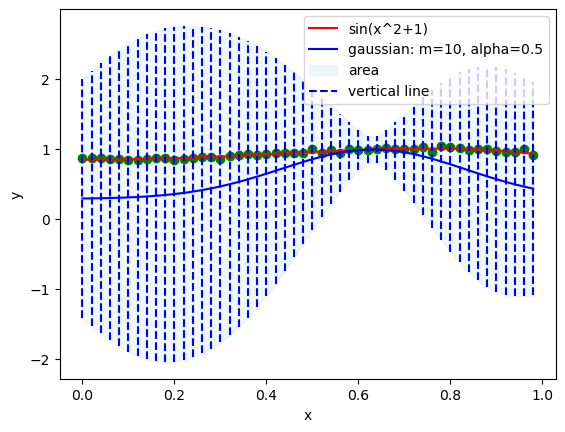

[31, 32]
2


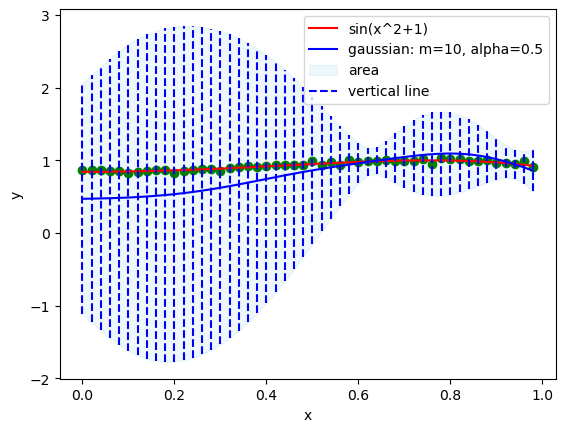

[31, 32, 47]
3


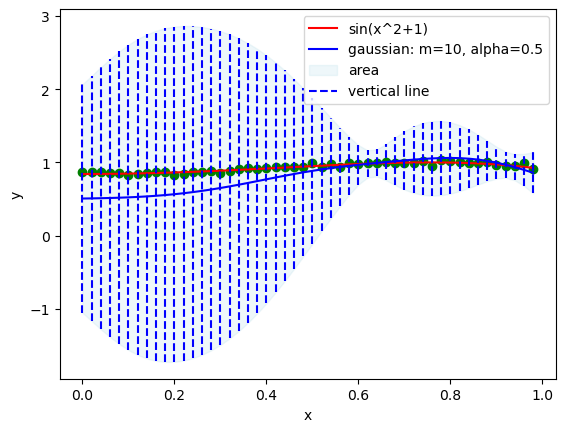

[31, 32, 47, 46]
4


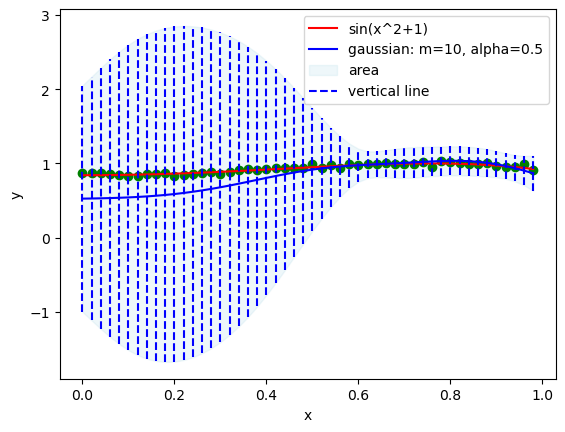

[31, 32, 47, 46, 39]
5


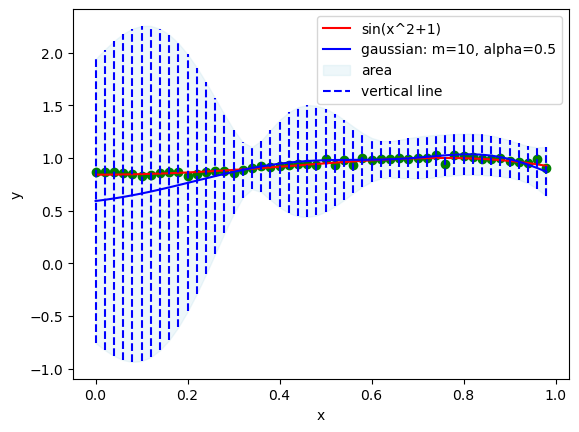

[31, 32, 47, 46, 39, 17]
6


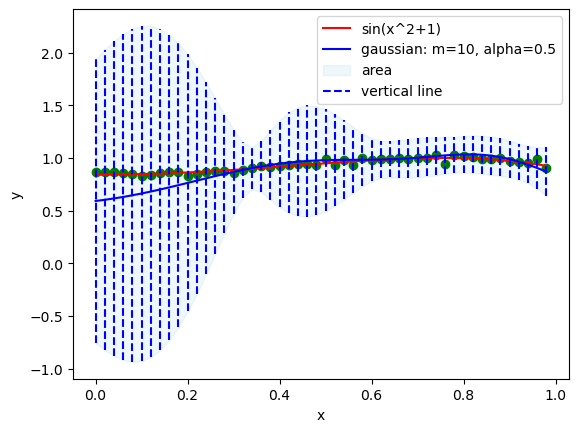

[31, 32, 47, 46, 39, 17, 39]
7


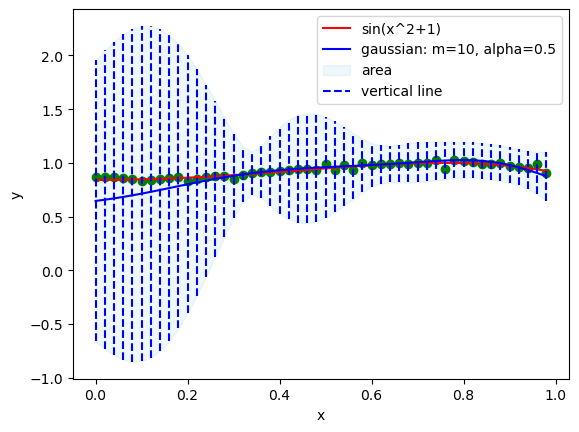

[31, 32, 47, 46, 39, 17, 39, 43]
8


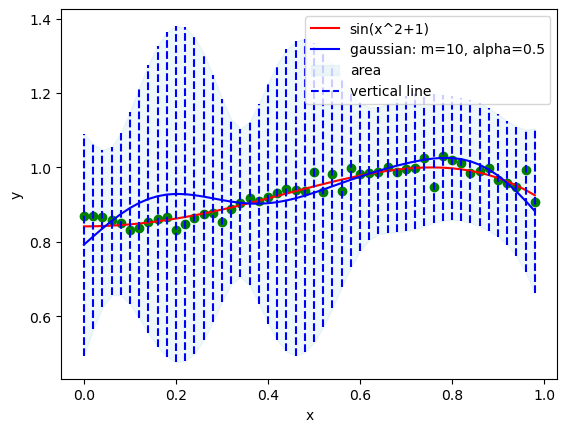

[31, 32, 47, 46, 39, 17, 39, 43, 3]
9


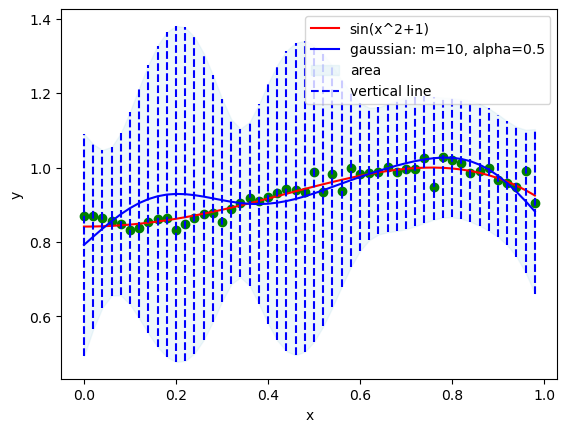

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39]
10


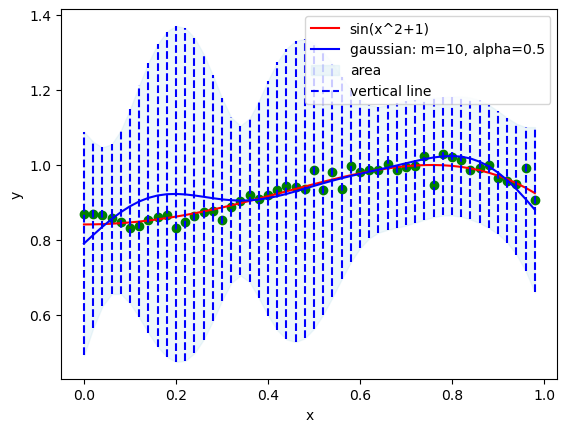

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36]
11


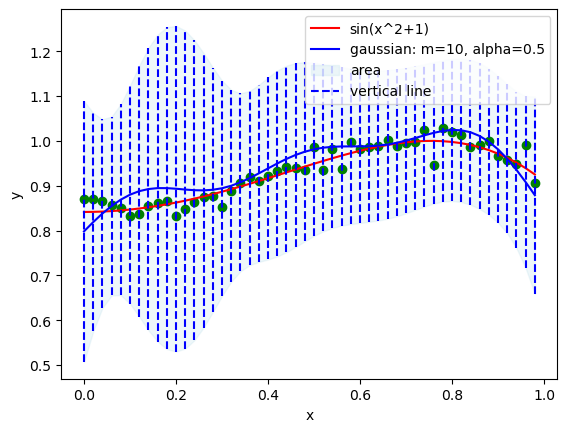

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25]
12


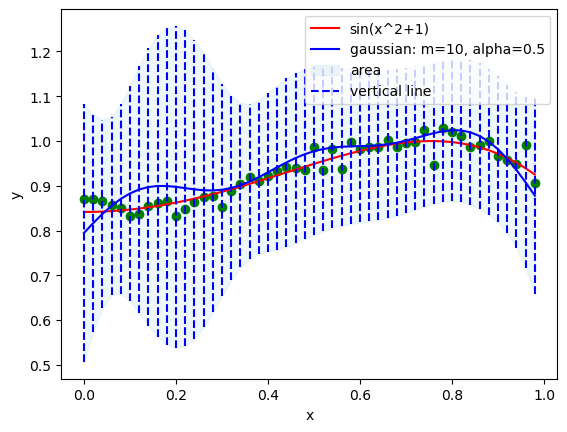

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19]
13


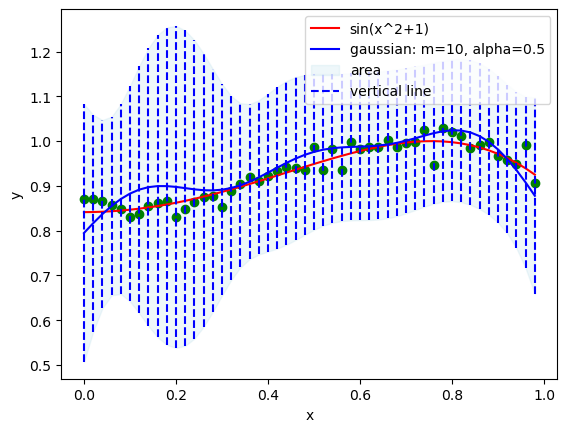

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27]
14


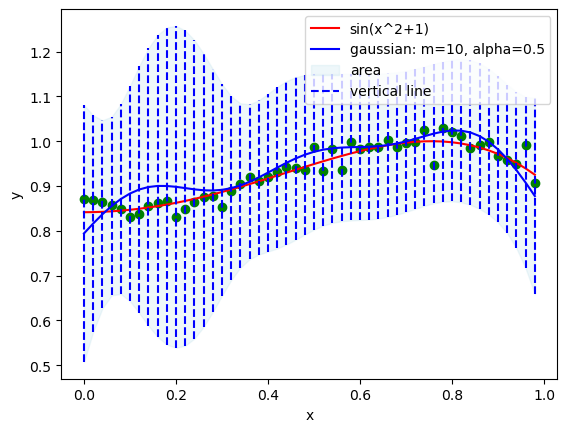

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35]
15


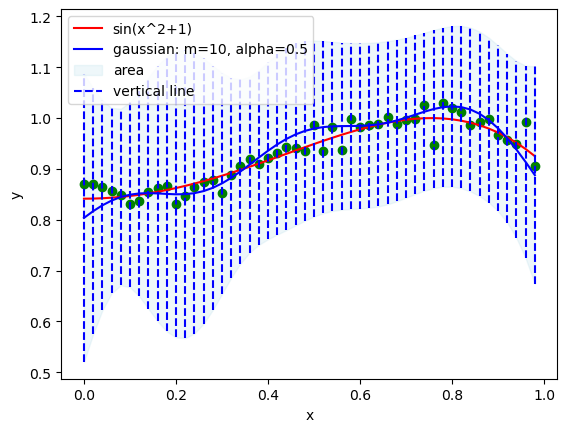

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5]
16


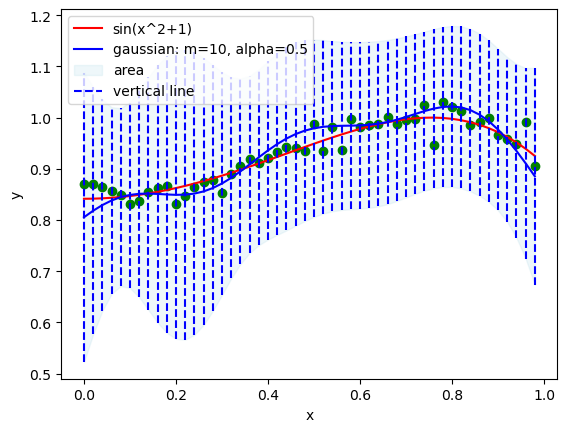

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45]
17


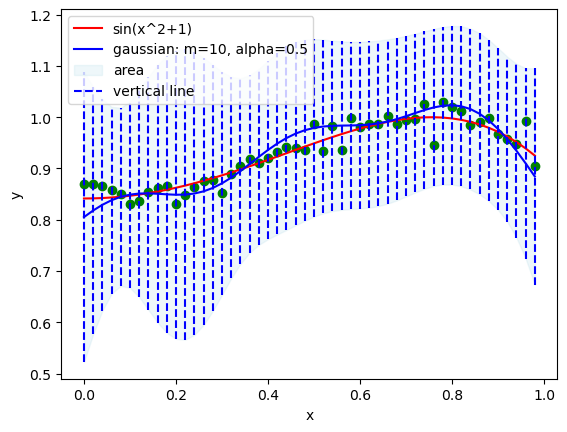

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39]
18


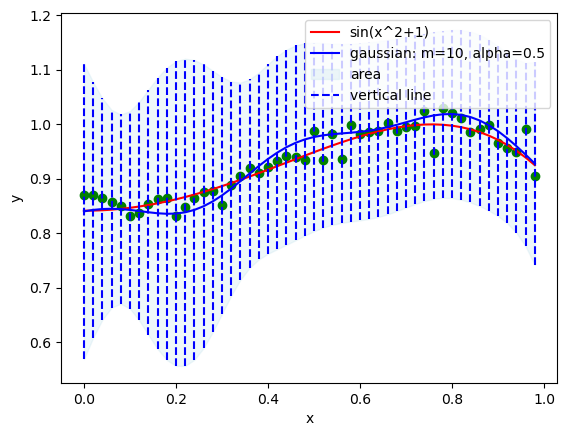

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48]
19


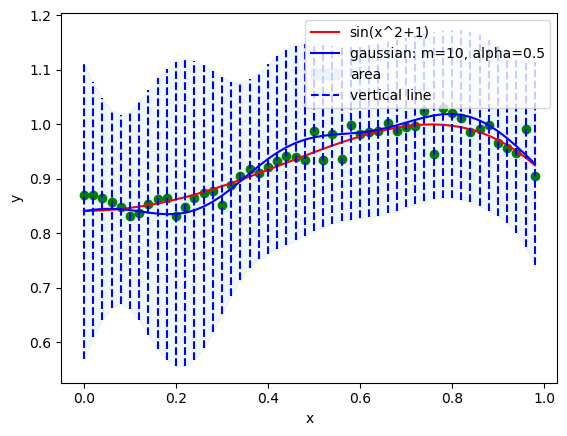

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30]
20


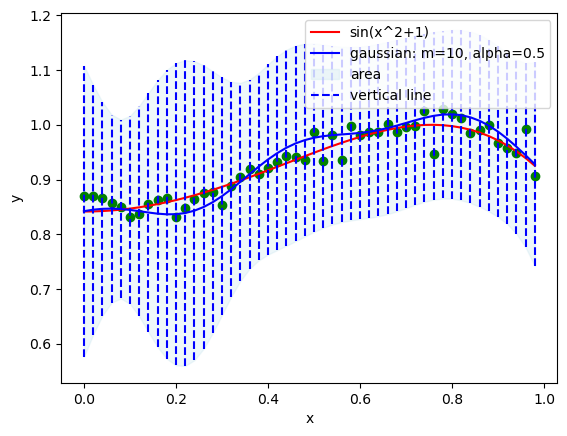

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4]
21


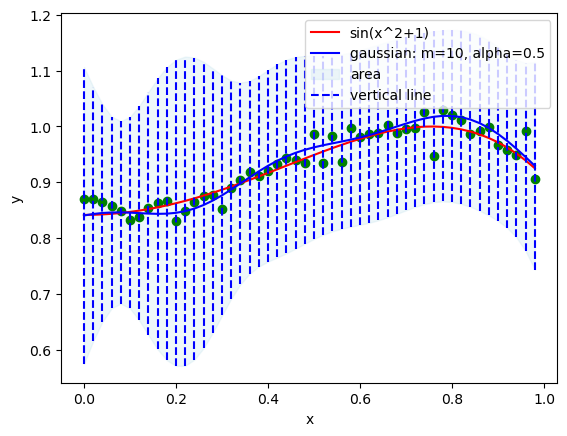

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26]
22


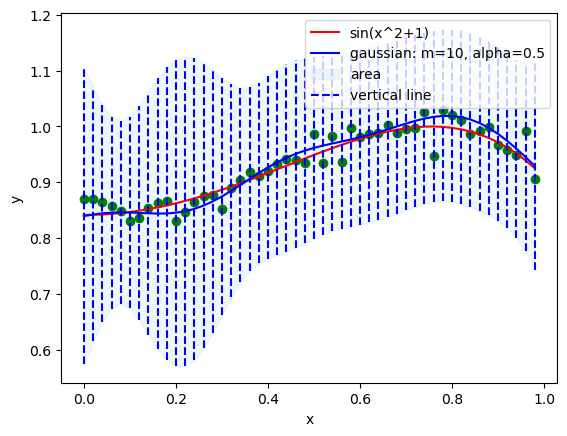

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19]
23


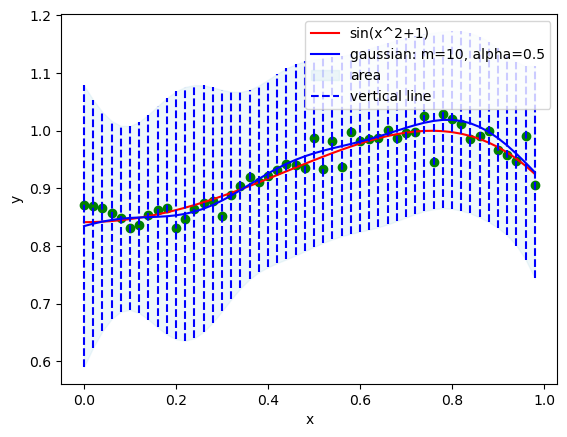

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7]
24


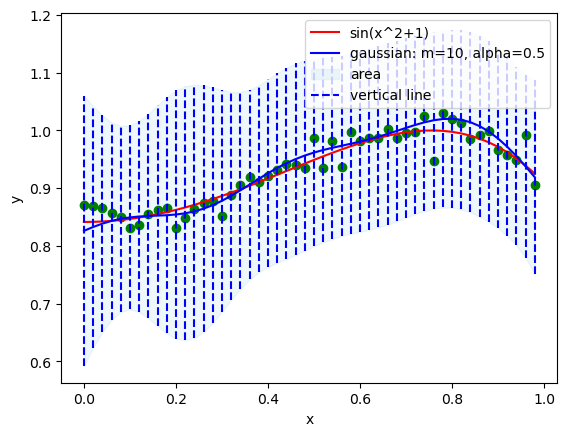

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49]
25


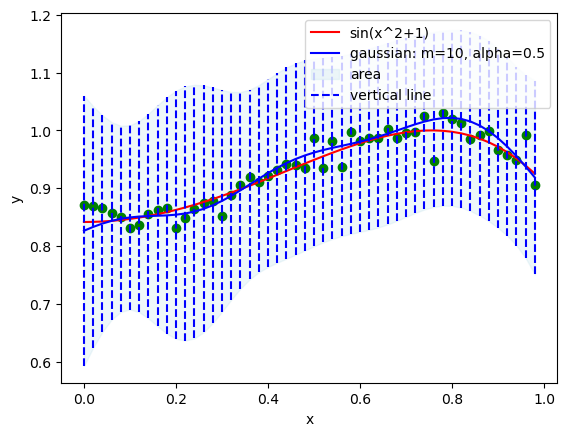

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39]
26


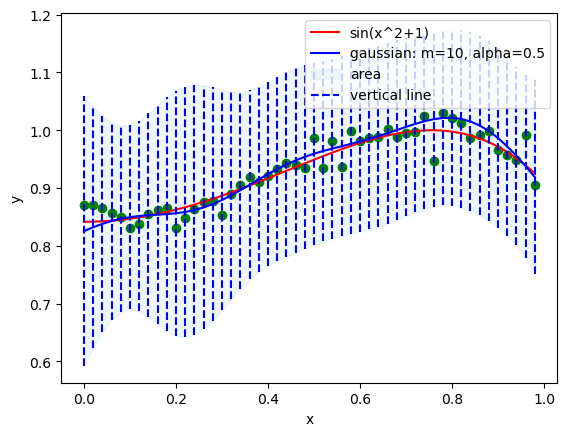

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23]
27


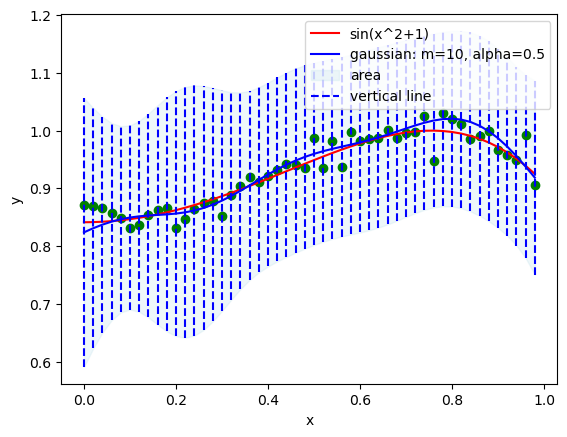

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36]
28


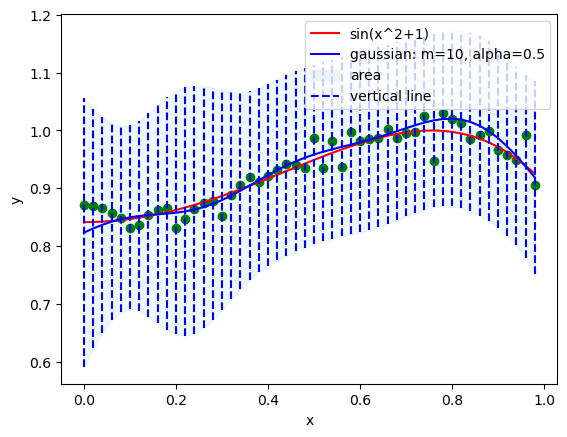

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23]
29


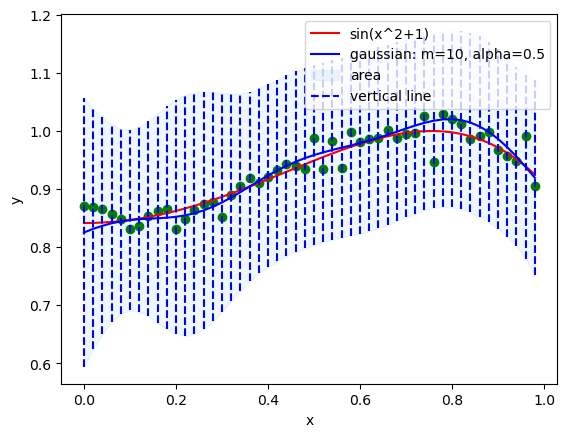

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6]
30


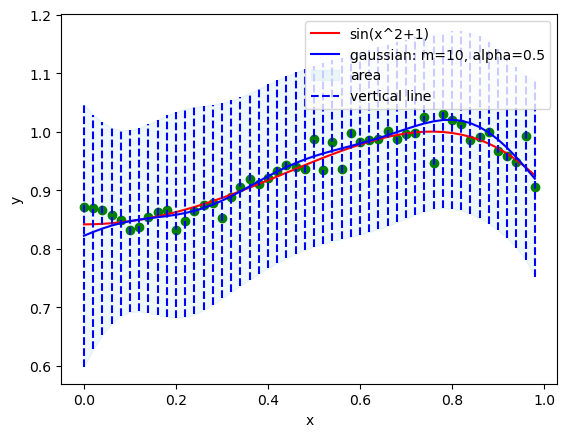

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13]
31


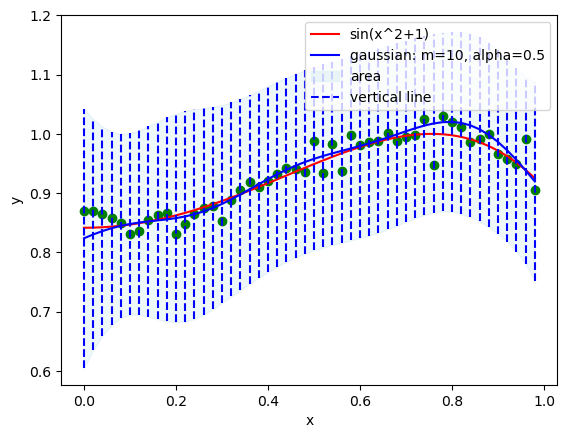

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4]
32


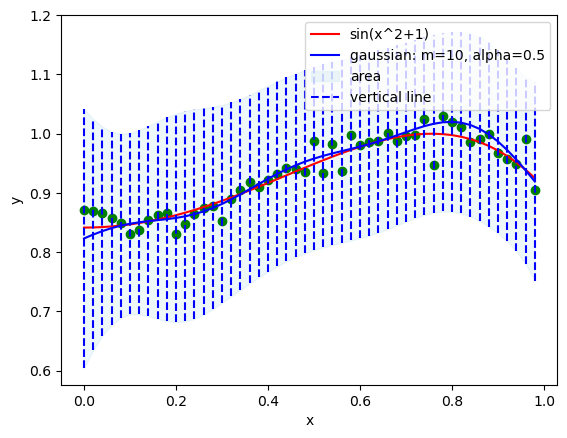

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34]
33


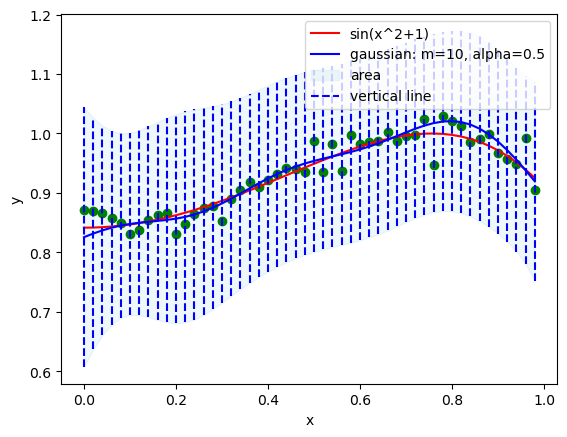

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28]
34


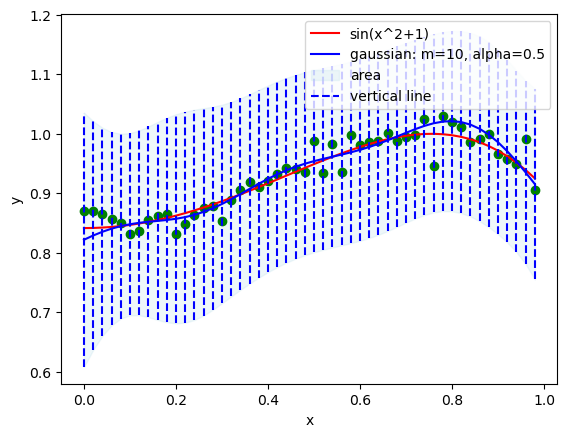

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49]
35


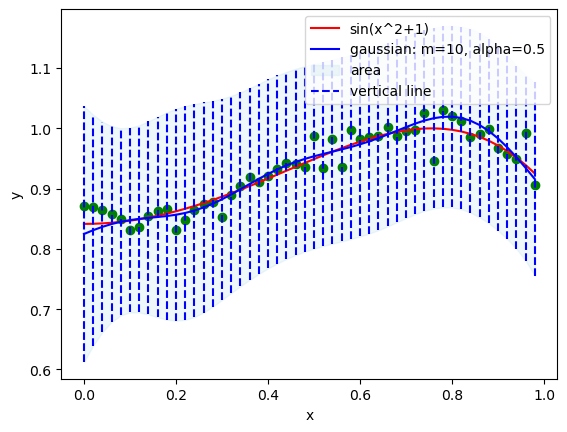

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43]
36


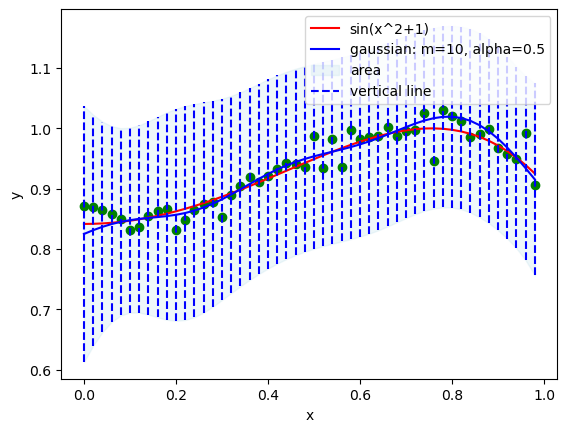

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47]
37


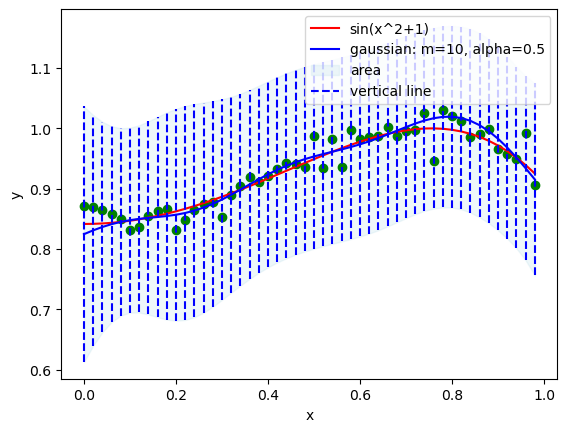

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20]
38


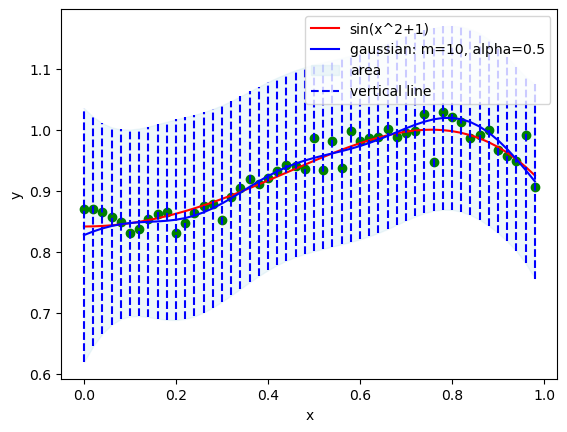

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11]
39


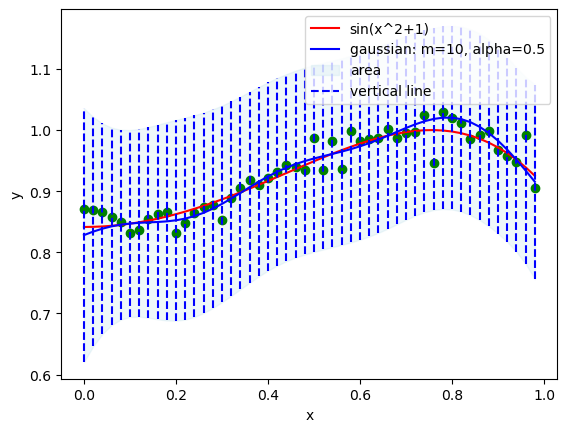

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37]
40


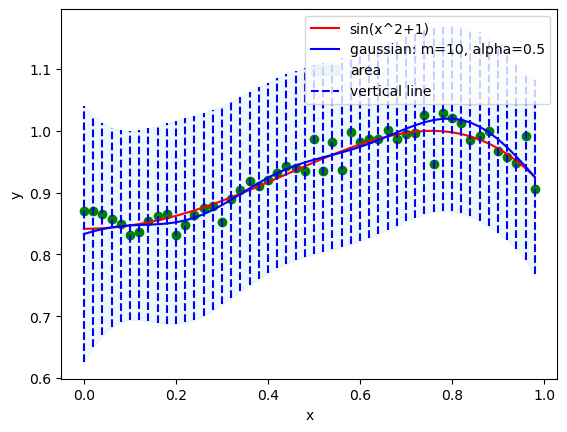

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48]
41


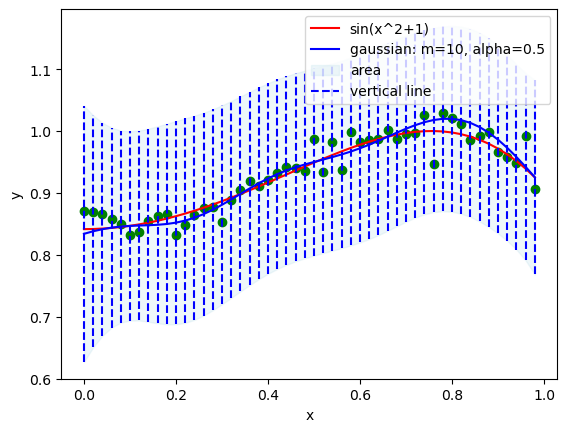

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26]
42


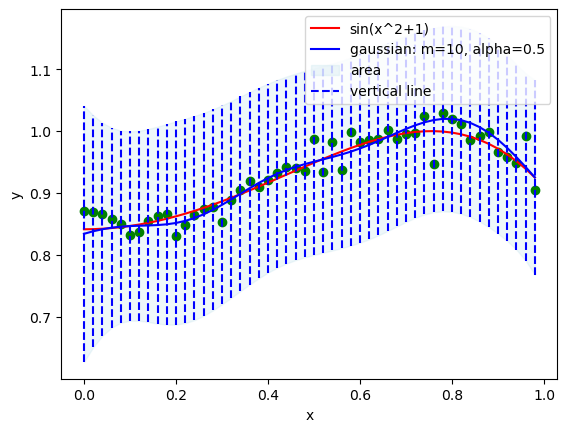

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22]
43


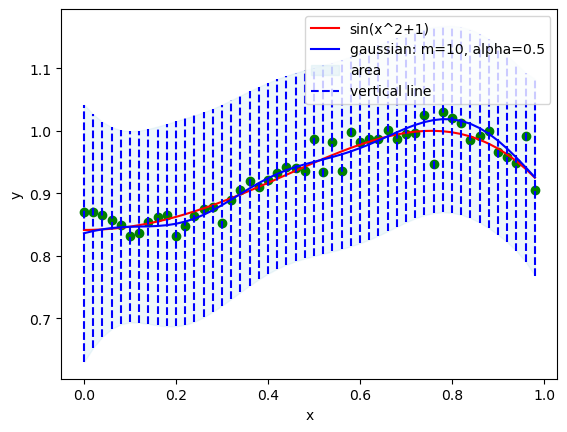

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22, 43]
44


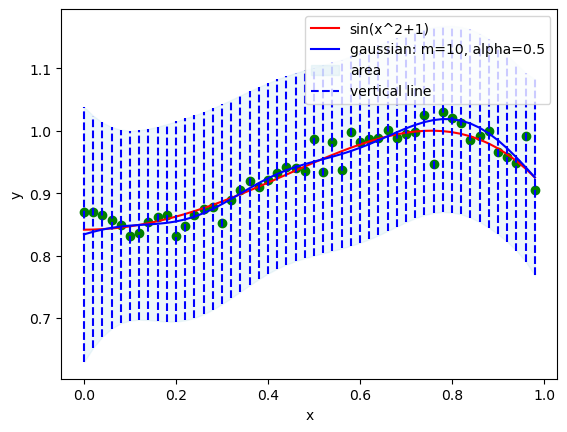

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22, 43, 8]
45


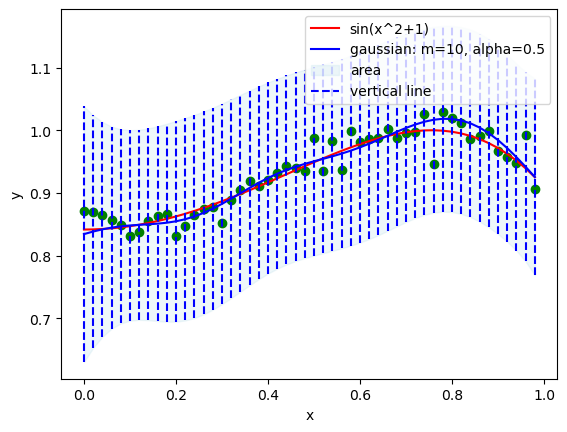

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22, 43, 8, 41]
46


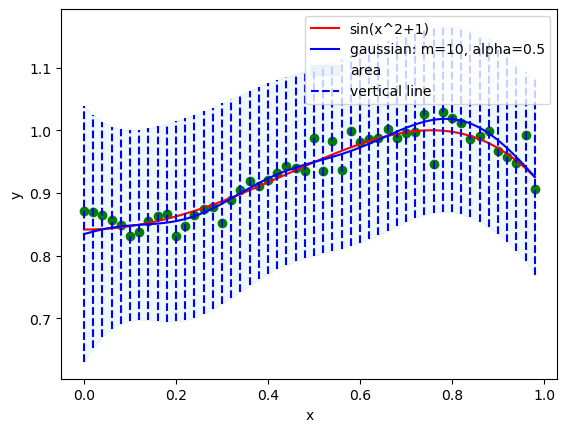

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22, 43, 8, 41, 24]
47


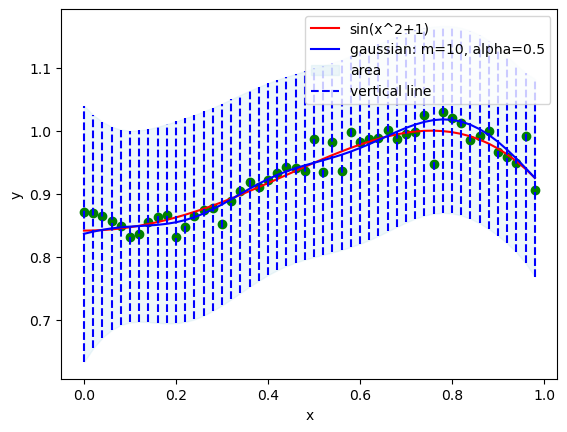

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22, 43, 8, 41, 24, 45]
48


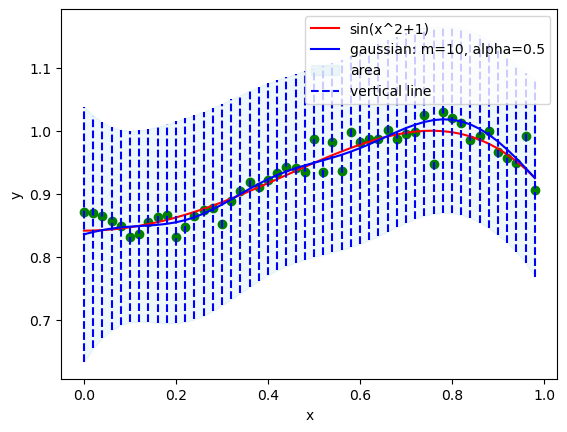

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22, 43, 8, 41, 24, 45, 44]
49


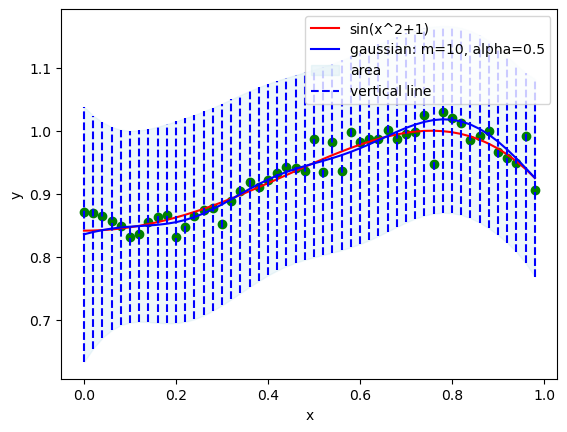

[31, 32, 47, 46, 39, 17, 39, 43, 3, 39, 36, 25, 19, 27, 35, 5, 45, 39, 48, 30, 4, 26, 19, 7, 49, 39, 23, 36, 23, 6, 13, 4, 34, 28, 49, 43, 47, 20, 11, 37, 48, 26, 22, 43, 8, 41, 24, 45, 44, 24]
50


In [67]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


i_arr = []

x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)


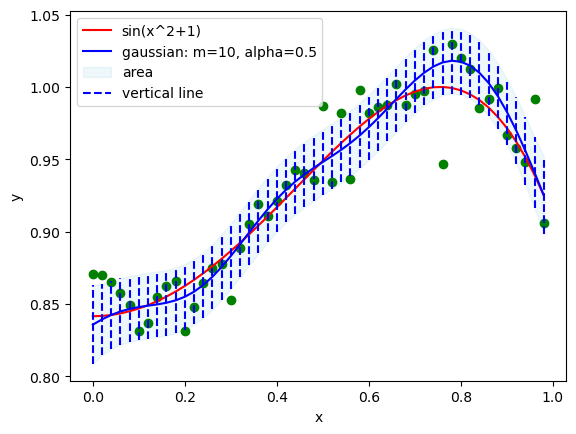

In [68]:
nodes = 50
mu = 0
var = 0.02

w_, X, ss = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
var_x = []
for el in X:
    var_x.append(var + el.T @ ss @ el)
display_distribution(m, alpha, x, y_, y_origin, y_noise, var_x, 'gaussian', 'sin(x^2+1)')